In [23]:
from datetime import datetime, timedelta
from math import ceil
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from daily_new.main import (
    load_current_stocks, select_state_based_stocks,
    update_current_stocks)

In [2]:
!ls ..

R         daily     data      models    project   target
README.md daily_new data_new  notebooks scripts   utils


In [3]:
DATA = '../data_new'

In [4]:
current_stocks = load_current_stocks()

Loading current stock lists...


In [5]:
current_best_stocks = select_state_based_stocks()

Selecting best stocks for current state...
transitions:
   current_state  next_state      prob
0              0           0  0.794857
1              0           1  0.033714
2              0           2  0.041714
3              0           3  0.044000
4              0           4  0.013143
5              0           5  0.072571
states:             state
Date             
2023-10-16      4
2023-10-17      4
2023-10-18      0
2023-10-19      0
2023-10-20      0
Current state: 0
Data start date: 1973-10-22
Iteration: 1
best weighted: ['AAON', 'AAPL', 'ABBV', 'ADBE', 'ADSK', 'ADUS', 'AMBA', 'AMZN', 'APO', 'APTV', 'AVGO', 'AXON', 'AZO', 'BAH', 'BBY', 'BCC', 'CDW', 'CF', 'CHTR', 'CME', 'CMG', 'CNC', 'CPRT', 'CROX', 'CSCO', 'CTSH', 'DPZ', 'EME', 'ENPH', 'ENSG', 'EPAM', 'EW', 'FANG', 'FAST', 'FICO', 'FN', 'FTNT', 'GIL', 'GOOG', 'GPS', 'GTLS', 'HCA', 'HD', 'IDXX', 'JBL', 'JCI', 'LFMD', 'LPLA', 'LULU', 'LYB', 'MA', 'MCHP', 'MDXG', 'MELI', 'META', 'MOH', 'MPC', 'MPWR', 'MSCI', 'MSFT', 'MTDR', 'MUS

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

Current best stocks: []


In [6]:
TRANSACTIONS = f'{DATA}/transactions.csv'
transactions = (
    pd.read_csv(TRANSACTIONS).rename(columns={'Unnamed: 0': 'stock'}))
transactions.head()

,stock,price,direction,RSI,RSIRev,fair_value_mult,geomean,sharpe,weighted_sharpe,et,...,up_down,exact_amt,fid_target,fid_diff,fid_bid_ask,fid_nshares,schwab_target,schwab_diff,schwab_bid_ask,schwab_nshares
0,VRTS,170.940002,0,0.004792,0.995208,0.252184,0.223475,0.239150,-5.369226,0,...,1,0.000000,0.000000,0.000000,178.959731,0,354.327576,12.327576,172.522803,0
1,TSLA,211.990005,0,0.016773,0.983227,0.017077,0.352966,0.799062,-5.106965,0,...,1,420.672610,2942.609831,1670.609831,210.606910,8,354.327576,354.327576,210.336305,2
2,TECH,64.070000,0,0.021965,0.978035,0.488880,0.022974,0.630354,-5.555772,0,...,1,127.124693,0.000000,0.000000,65.357450,0,187.560214,123.560214,63.562347,2
3,PAC,126.220001,0,0.031150,0.968850,0.524226,0.022556,0.527714,-3.362182,2020,...,1,376.027723,2942.609831,291.609831,125.464182,2,354.327576,354.327576,125.342574,3
4,ABNB,116.489998,0,0.018414,0.981586,0.052778,0.352349,0.127895,-5.637723,582,...,1,115.025699,974.779247,741.779247,115.120447,6,117.940701,117.940701,115.025699,1


In [7]:
current_stocks, buy_stats = update_current_stocks(
    current_stocks, current_best_stocks, transactions)

Updating current stock lists...
AREN not listed
removing AREN from lingerers
HCA not listed
removing HCA from lingerers
MICS not listed
removing MICS from lingerers
SPWR not listed
removing SPWR from lingerers
TECH not listed
removing TECH from lingerers
ULTA not listed
removing ULTA from lingerers
Owned stock:0 not in current stocks. Add to lingerers
Owned stock:1 not in current stocks. Add to lingerers
Owned stock:2 not in current stocks. Add to lingerers
Owned stock:3 not in current stocks. Add to lingerers
Owned stock:4 not in current stocks. Add to lingerers
Owned stock:5 not in current stocks. Add to lingerers
Owned stock:6 not in current stocks. Add to lingerers
Owned stock:7 not in current stocks. Add to lingerers
Owned stock:8 not in current stocks. Add to lingerers
Owned stock:9 not in current stocks. Add to lingerers
Owned stock:10 not in current stocks. Add to lingerers
Owned stock:11 not in current stocks. Add to lingerers
Owned stock:12 not in current stocks. Add to linge

In [8]:
buy_stats

,stock,price,direction,RSI,RSIRev,fair_value_mult,geomean,sharpe,weighted_sharpe,et,...,up_down,exact_amt,fid_target,fid_diff,fid_bid_ask,fid_nshares,schwab_target,schwab_diff,schwab_bid_ask,schwab_nshares
0,VRTS,170.940002,0,0.004792,0.995208,0.252184,0.223475,0.239150,-5.369226,0,...,1,0.000000,0.000000,0.000000,178.959731,0,354.327576,12.327576,172.522803,0
1,TSLA,211.990005,0,0.016773,0.983227,0.017077,0.352966,0.799062,-5.106965,0,...,1,420.672610,2942.609831,1670.609831,210.606910,8,354.327576,354.327576,210.336305,2
2,TECH,64.070000,0,0.021965,0.978035,0.488880,0.022974,0.630354,-5.555772,0,...,1,127.124693,0.000000,0.000000,65.357450,0,187.560214,123.560214,63.562347,2
3,PAC,126.220001,0,0.031150,0.968850,0.524226,0.022556,0.527714,-3.362182,2020,...,1,376.027723,2942.609831,291.609831,125.464182,2,354.327576,354.327576,125.342574,3
4,ABNB,116.489998,0,0.018414,0.981586,0.052778,0.352349,0.127895,-5.637723,582,...,1,115.025699,974.779247,741.779247,115.120447,6,117.940701,117.940701,115.025699,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,SBUX,94.190002,1,0.512380,0.487620,0.843129,0.099833,0.514881,-4.887986,0,...,0,-380.565741,1266.334367,-240.665633,98.070884,-2,32.723952,-344.276048,95.141435,-4
95,DDOG,86.080002,0,0.150591,0.849409,0.244660,0.451435,0.635317,-4.370040,2066,...,0,0.000000,2204.070595,741.070595,81.717940,9,58.005963,-27.994037,88.918487,0
96,DGX,123.730003,1,0.334265,0.665735,0.827641,0.117794,0.512996,-4.642057,0,...,0,-250.233917,1605.792293,-992.207707,128.774794,-8,41.911003,-205.088997,125.116959,-2
97,UPST,24.690001,0,0.148148,0.851852,0.270950,0.506757,0.591068,-4.683108,2000,...,0,0.000000,1563.491682,230.491682,22.952074,10,39.646710,-9.353290,25.694751,0


In [9]:
buy_stats.set_index('stock', inplace=True)
buy_stats.head()

,price,direction,RSI,RSIRev,fair_value_mult,geomean,sharpe,weighted_sharpe,et,schwab,...,up_down,exact_amt,fid_target,fid_diff,fid_bid_ask,fid_nshares,schwab_target,schwab_diff,schwab_bid_ask,schwab_nshares
stock,,,,,,,,,,,,,,,,,,,,,
VRTS,170.940002,0,0.004792,0.995208,0.252184,0.223475,0.239150,-5.369226,0,342,...,1,0.000000,0.000000,0.000000,178.959731,0,354.327576,12.327576,172.522803,0
TSLA,211.990005,0,0.016773,0.983227,0.017077,0.352966,0.799062,-5.106965,0,0,...,1,420.672610,2942.609831,1670.609831,210.606910,8,354.327576,354.327576,210.336305,2
TECH,64.070000,0,0.021965,0.978035,0.488880,0.022974,0.630354,-5.555772,0,64,...,1,127.124693,0.000000,0.000000,65.357450,0,187.560214,123.560214,63.562347,2
PAC,126.220001,0,0.031150,0.968850,0.524226,0.022556,0.527714,-3.362182,2020,0,...,1,376.027723,2942.609831,291.609831,125.464182,2,354.327576,354.327576,125.342574,3
ABNB,116.489998,0,0.018414,0.981586,0.052778,0.352349,0.127895,-5.637723,582,0,...,1,115.025699,974.779247,741.779247,115.120447,6,117.940701,117.940701,115.025699,1


In [10]:
STOCK_METRICS = f'{DATA}/stock_metrics.csv'
stock_metrics = pd.read_csv(STOCK_METRICS, index_col=0)
stock_metrics.head()

,price,direction,RSI,RSIRev,fair_value_mult,geomean,sharpe,weighted_sharpe
stock,,,,,,,,
AAPL,172.880005,0,0.124201,0.875799,0.496823,0.142439,0.970900,-5.876397
ABNB,116.489998,0,0.018414,0.981586,0.052778,0.352349,0.127895,-5.637723
ACN,297.000000,0,0.053115,0.946885,0.490866,0.262740,0.764054,-6.632287
ADBE,540.960022,0,0.384185,0.615815,0.320492,0.966165,0.882383,-6.039601
ADYEY,7.190000,1,0.126243,0.873757,0.148039,0.016741,0.332948,-3.333642


In [11]:
NEXT_DAY_DISTRIBUTIONS = f'{DATA}/next_day_distributions.csv'
next_day_distributions = pd.read_csv(NEXT_DAY_DISTRIBUTIONS)
next_day_distributions.head()

,AAPL_trend,AAPL_high_mult,AAPL_low_mult,ABNB_trend,ABNB_high_mult,ABNB_low_mult,ACN_trend,ACN_high_mult,ACN_low_mult,ADBE_trend,...,VTRS_low_mult,ZBRA_trend,ZBRA_high_mult,ZBRA_low_mult,ZM_trend,ZM_high_mult,ZM_low_mult,^GSPC_trend,^GSPC_high_mult,^GSPC_low_mult
0,0,0.996916,0.969296,0,0.995665,0.948096,0,0.998338,0.972758,0,...,0.978676,0,0.998924,0.976183,0,0.989021,0.947292,0,0.999649,0.982075
1,0,1.022280,1.001581,0,1.012705,0.987416,0,1.024539,1.004132,0,...,0.991809,0,1.024228,1.001652,0,1.012174,0.989483,0,1.015991,1.002188
2,0,1.007370,0.980582,0,1.015661,0.975052,1,1.000677,0.985821,0,...,0.985926,0,1.002170,0.982758,0,1.002956,0.972736,0,1.004568,0.987291
3,0,1.015634,1.005070,0,1.024036,1.008072,1,1.013346,1.001876,0,...,1.007441,0,1.014495,0.994866,0,1.019042,1.000631,1,1.015222,1.004625
4,1,1.006211,0.994905,0,1.026533,0.999292,1,1.004230,0.994759,1,...,0.997799,0,1.001527,0.976646,0,1.016662,0.989710,1,1.002787,0.996923


### transacting.TransactionDeterminer

In [12]:
FRAC_IN = 0.7
P_STATS0_BUY = {
    'et':   {'buy': 0.07, 'sell': 0.01},    # incr by 1                         
    'fid':  {'buy': 0.12, 'sell': 0.01},    #         2                         
    'schwab': {'buy': 0.01, 'sell': 0.48}}  #         3                         
TRANSACT_IF = {
    'et': {'curr': 5, 'opp': 5},
    'fid': {'curr': 4, 'opp': 4},
    'schwab': {'curr': 3, 'opp': 3}}
p_stats0_buy = P_STATS0_BUY
tansact_if = TRANSACT_IF

frac_in = FRAC_IN
df = stock_metrics.copy()

In [13]:
# add_account_indicators
df_stocks = set(df.index)
bs_stocks = set(buy_stats.index)
print('bs only:', bs_stocks - df_stocks)
print('df only:', df_stocks - bs_stocks)
df = pd.concat(
    [df,
     buy_stats[[
         'inEt', 'inFid', 'in_self_managed', 'currentlyActive']]],
    axis=1)
df.head()

bs only: set()
df only: {'CPNG', 'ADBE', 'PTON', 'VTRS', 'GOOG', 'OPEN', 'KNSL', 'RDFN', 'MDB'}


,price,direction,RSI,RSIRev,fair_value_mult,geomean,sharpe,weighted_sharpe,inEt,inFid,in_self_managed,currentlyActive
stock,,,,,,,,,,,,
AAPL,172.880005,0,0.124201,0.875799,0.496823,0.142439,0.970900,-5.876397,0.0,1.0,1.0,1.0
ABNB,116.489998,0,0.018414,0.981586,0.052778,0.352349,0.127895,-5.637723,1.0,1.0,1.0,1.0
ACN,297.000000,0,0.053115,0.946885,0.490866,0.262740,0.764054,-6.632287,0.0,1.0,1.0,1.0
ADBE,540.960022,0,0.384185,0.615815,0.320492,0.966165,0.882383,-6.039601,NaN,NaN,NaN,NaN
ADYEY,7.190000,1,0.126243,0.873757,0.148039,0.016741,0.332948,-3.333642,1.0,1.0,0.0,1.0


In [69]:
def get_harmonic_mean(weights, *cols):
    n_cols = len(cols)
    recip_sum = 0
    for col in cols:
        recip_sum += (1 / df[col])
    hmean = n_cols / recip_sum
    return hmean

In [106]:
def get_weighted_harmonic_mean(weights, *cols):
    s_w = sum(weights)
    denom = 0
    for w, col in zip(weights, cols):
        denom += (w / df[col])
    return s_w / denom

In [134]:
# add_status
SCALED_BOUNDS = 10
W = [1, 1, 100] 
#W = [0.3333, 0.3333, 0.3334]
#df['status'] = get_harmonic_mean(
#    W, 'RSI', 'fair_value_mult', 'geomean')
df['status'] = get_weighted_harmonic_mean(
    W, 'RSI', 'fair_value_mult', 'geomean')
df['status_scaled'] = (
    (0.6 * np.tan(3 * (1 - df['status']) - 1.5)))
    #.clip(-SCALED_BOUNDS, SCALED_BOUNDS))

In [135]:
df.status

stock
AAPL     0.143235
ABNB     0.285663
ACN      0.254067
ADBE     0.933852
ADYEY    0.017034
           ...   
VRTS     0.154520
VRTX     0.436438
VTRS     0.325243
ZBRA     0.051031
ZM       0.477710
Name: status, Length: 101, dtype: float64

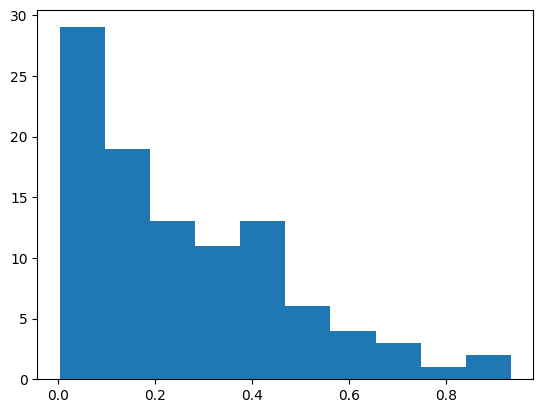

In [136]:
plt.hist(df.status);

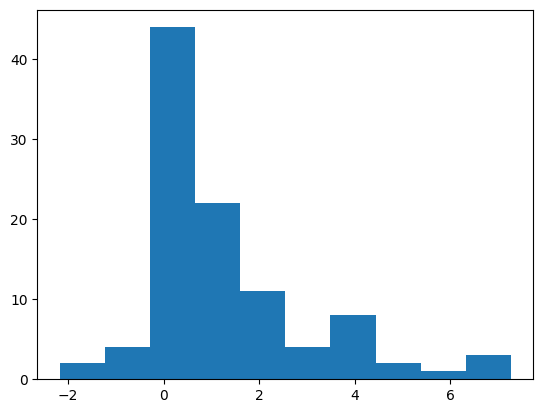

In [137]:
plt.hist(df.status_scaled);

In [138]:
df.sort_values('status_scaled', ascending=False)

,price,direction,RSI,RSIRev,fair_value_mult,geomean,sharpe,weighted_sharpe,inEt,inFid,...,currentlyActive,status,status_scaled,sharpe_capped,sharpe_scaled,weighted_sharpe_capped,weighted_sharpe_scaled,sharpe_adj_status,w_sharpe_adj_status,mean_sharpe_adj_status
stock,,,,,,,,,,,,,,,,,,,,,
UI,116.769997,0,0.064696,0.935304,0.089754,0.003759,0.464613,-4.301538,0.0,0.0,...,0.0,0.003831,7.274946,0.464613,1.711901,-4.301538,4.310008,23.695942,5440.946121,2732.321032
NVCR,14.560000,1,0.149950,0.850050,0.171682,0.004727,0.286703,-5.061864,1.0,1.0,...,1.0,0.004819,7.020893,0.286703,1.533991,-5.061864,3.549682,10.014464,917.667225,463.840844
SPWR,5.090000,0,0.071486,0.928514,0.112391,0.005848,0.124032,-5.060291,0.0,0.0,...,0.0,0.005957,6.749138,0.124032,1.371320,-5.060291,3.551255,4.997656,637.342624,321.170140
RMD,144.199997,1,0.314696,0.685304,0.691025,0.008354,0.508417,-4.993104,0.0,1.0,...,1.0,0.008518,6.207991,0.508417,1.755705,-4.993104,3.618442,10.406840,211.039700,110.723270
ADYEY,7.190000,1,0.126243,0.873757,0.148039,0.016741,0.332948,-3.333642,1.0,1.0,...,1.0,0.017034,4.897726,0.332948,1.580235,-3.333642,5.277903,4.113205,170.953722,87.533464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TASK,8.910000,1,0.444062,0.555938,0.537815,0.673036,-0.247288,-7.611546,1.0,1.0,...,1.0,0.668012,-0.330934,-0.247288,1.000000,-7.611546,1.000000,1.000000,1.000000,1.000000
CRWD,178.759995,0,0.543779,0.456221,0.437671,0.673846,0.728005,-3.352094,0.0,1.0,...,3.0,0.668740,-0.332644,0.728005,1.975293,-3.352094,5.259452,0.957909,0.900444,0.929177
GOOG,136.740005,0,0.350639,0.649361,0.285941,0.792398,0.753159,-6.749545,NaN,NaN,...,NaN,0.769530,-0.628497,0.753159,2.000446,-6.749545,1.862001,1.146511,1.130411,1.138461


In [19]:
# add_scaled_sharpes
for col in ['sharpe', 'weighted_sharpe']:
    lower = df[col].quantile(q=0.02)
    upper = df[col].quantile(q=0.98)
    df[f'{col}_capped'] = df[col].clip(lower, upper)
    min_capped = df[f'{col}_capped'].min()
    df[f'{col}_scaled'] = (
        df[f'{col}_capped'] - min_capped + 1)
df.head()

,price,direction,RSI,RSIRev,fair_value_mult,geomean,sharpe,weighted_sharpe,inEt,inFid,in_self_managed,currentlyActive,status,status_scaled,sharpe_capped,sharpe_scaled,weighted_sharpe_capped,weighted_sharpe_scaled
stock,,,,,,,,,,,,,,,,,,
AAPL,172.880005,0,0.124201,0.875799,0.496823,0.142439,0.970900,-5.876397,0.0,1.0,1.0,1.0,0.175595,0.881585,0.970900,2.218188,-5.876397,2.735149
ABNB,116.489998,0,0.018414,0.981586,0.052778,0.352349,0.127895,-5.637723,1.0,1.0,1.0,1.0,0.039425,3.135483,0.127895,1.375183,-5.637723,2.973822
ACN,297.000000,0,0.053115,0.946885,0.490866,0.262740,0.764054,-6.632287,0.0,1.0,1.0,1.0,0.121604,1.289144,0.764054,2.011342,-6.632287,1.979258
ADBE,540.960022,0,0.384185,0.615815,0.320492,0.966165,0.882383,-6.039601,NaN,NaN,NaN,NaN,0.443910,0.101926,0.882383,2.129670,-6.039601,2.571945
ADYEY,7.190000,1,0.126243,0.873757,0.148039,0.016741,0.332948,-3.333642,1.0,1.0,0.0,1.0,0.040317,3.090654,0.332948,1.580235,-3.333642,5.277903


In [21]:
# get_status_weights
df['sharpe_adj_status'] = (
    df.sharpe_scaled ** df.status_scaled)
df['w_sharpe_adj_status'] = (
    df.weighted_sharpe_scaled ** df.status_scaled)
df['mean_sharpe_adj_status'] = (
    (df.sharpe_adj_status + df.w_sharpe_adj_status) / 2)
df.head()

,price,direction,RSI,RSIRev,fair_value_mult,geomean,sharpe,weighted_sharpe,inEt,inFid,...,currentlyActive,status,status_scaled,sharpe_capped,sharpe_scaled,weighted_sharpe_capped,weighted_sharpe_scaled,sharpe_adj_status,w_sharpe_adj_status,mean_sharpe_adj_status
stock,,,,,,,,,,,,,,,,,,,,,
AAPL,172.880005,0,0.124201,0.875799,0.496823,0.142439,0.970900,-5.876397,0.0,1.0,...,1.0,0.175595,0.881585,0.970900,2.218188,-5.876397,2.735149,2.018492,2.427929,2.223210
ABNB,116.489998,0,0.018414,0.981586,0.052778,0.352349,0.127895,-5.637723,1.0,1.0,...,1.0,0.039425,3.135483,0.127895,1.375183,-5.637723,2.973822,2.715357,30.483936,16.599647
ACN,297.000000,0,0.053115,0.946885,0.490866,0.262740,0.764054,-6.632287,0.0,1.0,...,1.0,0.121604,1.289144,0.764054,2.011342,-6.632287,1.979258,2.461711,2.411207,2.436459
ADBE,540.960022,0,0.384185,0.615815,0.320492,0.966165,0.882383,-6.039601,NaN,NaN,...,NaN,0.443910,0.101926,0.882383,2.129670,-6.039601,2.571945,1.080099,1.101074,1.090586
ADYEY,7.190000,1,0.126243,0.873757,0.148039,0.016741,0.332948,-3.333642,1.0,1.0,...,1.0,0.040317,3.090654,0.332948,1.580235,-3.333642,5.277903,4.113205,170.953722,87.533464


In [22]:
df[df.currentlyActive.isnull()]

,price,direction,RSI,RSIRev,fair_value_mult,geomean,sharpe,weighted_sharpe,inEt,inFid,...,currentlyActive,status,status_scaled,sharpe_capped,sharpe_scaled,weighted_sharpe_capped,weighted_sharpe_scaled,sharpe_adj_status,w_sharpe_adj_status,mean_sharpe_adj_status
stock,,,,,,,,,,,,,,,,,,,,,
ADBE,540.960022,0,0.384185,0.615815,0.320492,0.966165,0.882383,-6.039601,NaN,NaN,...,NaN,0.443910,0.101926,0.882383,2.129670,-6.039601,2.571945,1.080099,1.101074,1.090586
CPNG,17.650000,0,0.603101,0.396899,0.614568,0.613084,-0.313758,-5.738079,NaN,NaN,...,NaN,0.610208,-0.205933,-0.247288,1.000000,-5.738079,2.873467,1.000000,0.804635,0.902317
GOOG,136.740005,0,0.350639,0.649361,0.285941,0.792398,0.753159,-6.749545,NaN,NaN,...,NaN,0.394159,0.197187,0.753159,2.000446,-6.749545,1.862001,1.146511,1.130411,1.138461
KNSL,424.779999,0,0.277255,0.722745,0.228446,0.629346,1.352796,-3.338236,NaN,NaN,...,NaN,0.313377,0.376061,1.018634,2.265922,-3.338236,5.273310,1.360172,1.868733,1.614452
MDB,346.279999,0,0.249833,0.750167,0.277962,0.441240,0.925799,-4.024231,NaN,NaN,...,NaN,0.304055,0.399854,0.925799,2.173087,-4.024231,4.587314,1.363898,1.838769,1.601333
OPEN,2.180000,0,0.067633,0.932367,0.141330,0.569638,0.029929,-2.583738,NaN,NaN,...,NaN,0.127028,1.236155,0.029929,1.277217,-2.583738,6.027807,1.353193,9.212927,5.283060
PTON,4.840000,1,0.368942,0.631058,0.428293,0.344062,-0.053878,-3.495145,NaN,NaN,...,NaN,0.377275,0.231459,-0.053878,1.193410,-3.495145,5.116401,1.041774,1.459138,1.250456
RDFN,5.070000,0,0.000643,0.999357,0.032505,0.040138,0.072536,-4.875521,NaN,NaN,...,NaN,0.001863,7.839762,0.072536,1.319823,-4.875521,3.736025,8.806743,30729.546277,15369.176510
VTRS,9.300000,0,0.118610,0.881390,0.247021,0.332080,-0.182434,-5.420169,NaN,NaN,...,NaN,0.193667,0.786325,-0.182434,1.064854,-5.420169,3.191377,1.050652,2.490524,1.770588
